**CAPSTONE PROJECT MODULE 2 ANDI M. AL FAYED**

Dalam project ini, penulis akan membuat analisa data penjualan untuk perusahaan SaaS. Masalah perusahaan beserta pemaparan data dan rekomendasi perusahaan akan diambil berdasarkan dataset yang disediakan. Oleh karena itu penulis akan menggunakan asumsi dasar bahwa perusahaan akan selalu mencari profit dan mengurangi biaya.

**BUSINESS PROBLEM**

Sebuah perusahaan SaaS mempunyai data selama 4 tahun penjualan produk mereka berserta Diskon yang mereka pakai. Perusahaan SaaS ingin mengetahui **Produk apa yang mempunyai performa terbaik hingga terburuk.** Dengan informasi ini, mereka akan menyesuaikan pendekatan Marketing beserta sumber daya untuk mencari efisiensi.

**DATA**

Data ini merupakan dataset penjualan perusahaan SaaS dengan 19 kolom. Setiap kolom merepresentasikan satu aspek dari sebuah transaksi penjualan dan setiap baris merepresentasikan transaksi penjualan itu sendiri. Berikut kolom yang digunakan

1. Row ID: Kode identifikasi unik setiap transaksi.
2. Order ID: Kode identifikasi unik setiap transaksi.
3. Order Date: Tanggal transaksi.
4. Date Key: Angka yang merepresentasikan tanggal transaksi (YYYYMMDD).
5. Contact Name: Nama individu yang melakukan transaksi.
6. Country: Nama negara dimana transaksi terjadi.
7. City: Nama kota dimana transaksi terjadi.
8. Region: Nama region dimana transaksi tersebut terjadi (EMEA, AMER, APJ) .
9. Subregion: Nama subregion dimana transaksi tersebut terjadi.
10. Customer: Nama perusahaan yang memesan produk.
11. Customer ID: kode identifikasi unik setiap kustomer.
12. Industry: Industri perusahaan yang melakukan pemesanan.
13. Segment: Segmentasi kustomer (SMB, Strategic, Enterprise, etc.).
14. Product: Produk yang dipesan.
15. License: Kode lisensi produk.
16. Sales: Jumlah nilai penjualan dari setiap transaksi.
17. Quantity: Jumlah produk dari setiap transaksi.
18. Discount: Diskon yang diberikan di setiap transaksi.
19. Profit: Profit yang didapatkan dari setiap transaksi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import geopandas as gpd


Berikut 5 baris teratas dan 5 baris terbawah dari dataset penjualan SaaS.

In [2]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [3]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Terlihat dari pemaparan data di atas, ada beberapa aspek dari dataset ini yang berada di luar tendensi normal. contohnya adalah profit yang bisa mencapai minus dan diskon yang bisa mencapai 80%. Hal-hal ini perlu diperhatikan sebagai potensi outlier dalam keperluan analisis.

In [4]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

Tabel di atas menunjukkan sebaran data unik setiap kolom dari tabel penjualan. Terlihat dalam kolom profit terdapat beberapa nilai negatif yang bisa berdampak terhadap misi perusahaan untuk mendapat profit. Sebelum kita memasuki tahap data analisis, kita harus memasuki tahap pembersihan data (Data Cleaning) agar dataset layak untuk dianalisis.

**DATA CLEANING & PREPARATION**

dalam setiap analisa data, dibutuhkan tahap pembersihan data dengan tujuan untuk membersihkan data dari data kosong, duplikat, dan outlier.

**MISSING VALUE**

Untuk tahap pertama dari pembersihan data, mari kita cek apakah data memiliki nilai kosong atau tidak.

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

In [7]:
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Dari pengecekan di atas, terlihat bahwa dataset penjualan ini tidak memiliki nilai kosong. Artinya setiap kolom tidak perlu diproses untuk mengisi data kosong atau menghapus baris.

**DATA TYPE**

Selanjutnya, kita akan mengubah data type dari kolom jika perlu diubah. Kolom yang diubah hanyalah satu yaitu kolom order date yang berlabel object. Kita akan mengubah order date dari object menjadi date time agar bisa digunakan untuk analisis time frame.

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Sekarang, data order date sudah berubah menjadi data type date time dan bisa digunakan untuk analisis.

**DUPLICATED DATA**

Selanjutnya, kita cek apakah dataset ini memiliki duplikat data. Kita tidak akan memasukkan kolom row id karena kolom tersebut hanya menunjukkan jumlah baris dari tabel penjualan dan bisa mempengaruhi program penghapusan duplikat.

In [10]:
Baris_duplikat = df[df.duplicated(subset=df.columns.difference(['Row ID']))]

if not Baris_duplikat.empty:
    print("Baris duplikat pertama:")
    print(Baris_duplikat)
else:
    print("Baris duplikat tidak ditemukan")



Baris duplikat tidak ditemukan


Setelah di jalankan program diatas, kita mengetahui bahwa tidak ada duplikat data dari tabel penjualan.

**Persebaran Data**

Sekarang kita akan mencoba mendeteksi persebaran data menggunakan boxplot. Dengan boxplot ini, Kita bisa melihat sebaran data dan melihat struktur data secara keseluruhan.

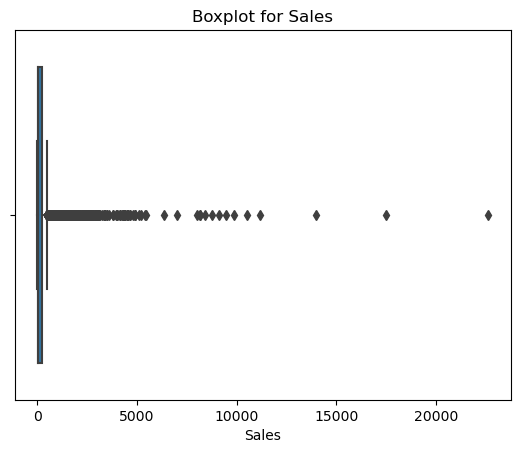

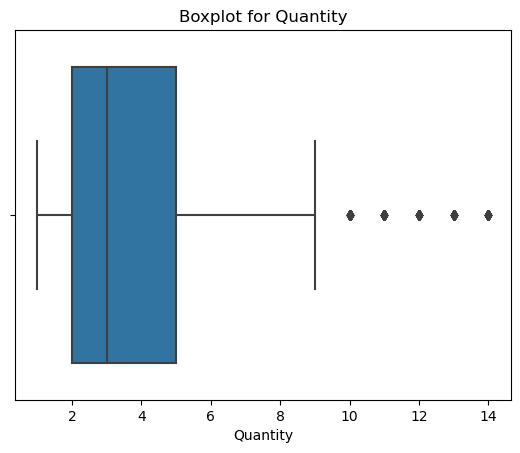

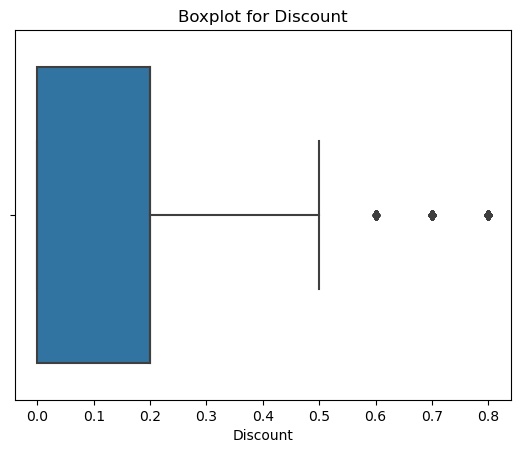

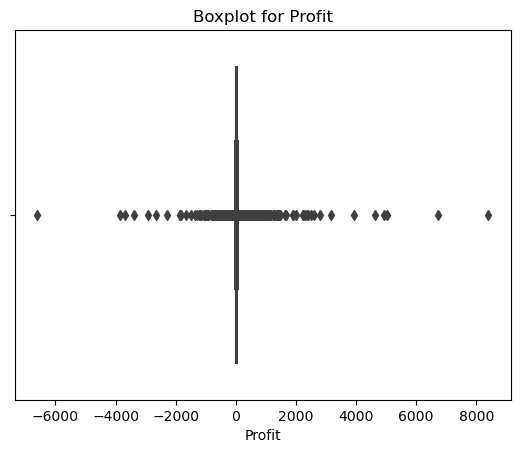

In [11]:
kolom_numerik = ['Sales', 'Quantity', 'Discount', 'Profit']

for x in kolom_numerik:
    plt.figure()
    sns.boxplot(x=df[x])
    plt.title(f'Boxplot for {x}')
    plt.show()

Terlihat untuk boxplot discount dan quantity terdapat distribusi condong positif. Namun untuk sebaran sales dan dan profit terdapat sebaran yang sangat padat sehingga kita tidak bisa mendapatkan kesimpulan yang berarti. Untuk mengatasi hal ini, maka diperlukan data processing.

**DATA PROCESSING**

Pemrosesan data adalah tahap selanjutnya untuk memastikan data bisa dianalisa. Data yang perlu diproses adalah data sales dan profit karena sifat persebaran datanya yang terlalu rapat. kita bisa menggunakan tranformasi dengan tujuan untuk membuat data lebih mudah diinterpretasikan. **Transformasi yang digunakan adalah transformasi Cube Root untuk kedua kolom dengan alasan bisa mengakomodir dan mentransformasi kolom profit yang bernilai negatif dan data sales mengikuti agar perubahan bersifat sama.** Jika menggunakan transformasi lain seperti logarithmic, Distribusi profit akan hanya mentransformasi profit positif namun profit negatif tidak berubah.

In [12]:
Konstan = 1e-10 

df['CubeRoot_Profit'] = np.cbrt(df['Profit'] + Konstan)
df['CubeRoot_Sales'] = np.cbrt(df['Sales'] + Konstan)


Penambahan konstan dilakukan di setiap transformasi Cube Root untuk mengantisipasi nilai kosong. Data frame baru juga dibuat untuk menyimpan data transformasi dan memastikan data lama tersimpan  keperluan untuk analisa lain.

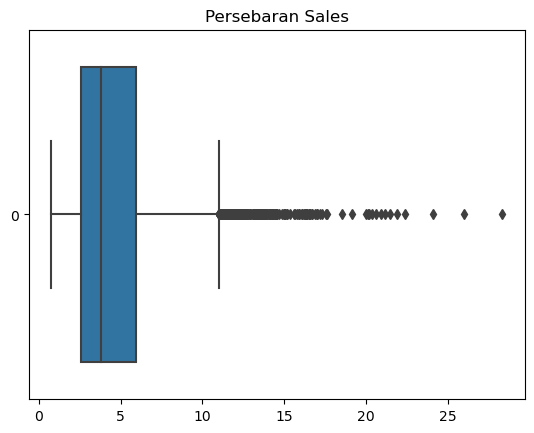

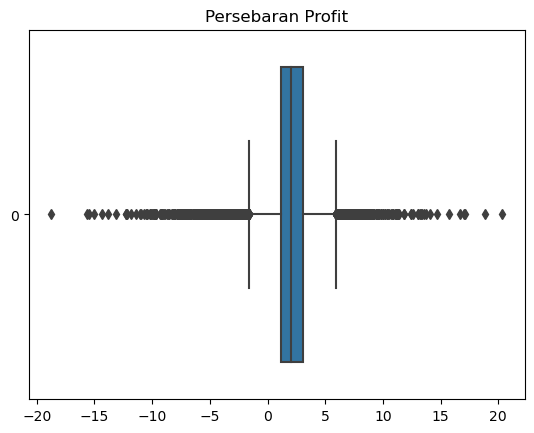

In [13]:
sns.boxplot(df['CubeRoot_Sales'], orient='h')
plt.title('Persebaran Sales')
plt.show()

sns.boxplot(df['CubeRoot_Profit'],orient='h')
plt.title('Persebaran Profit')
plt.show()

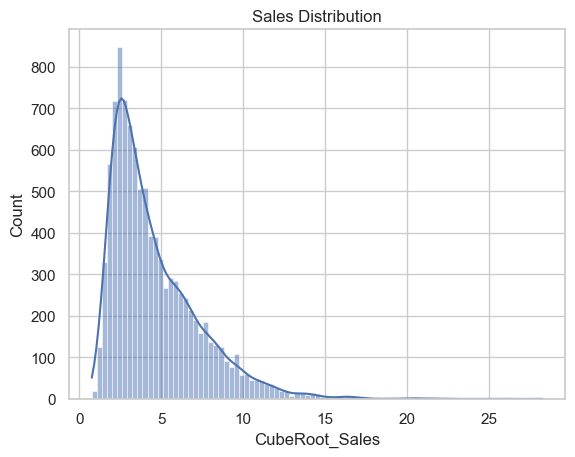

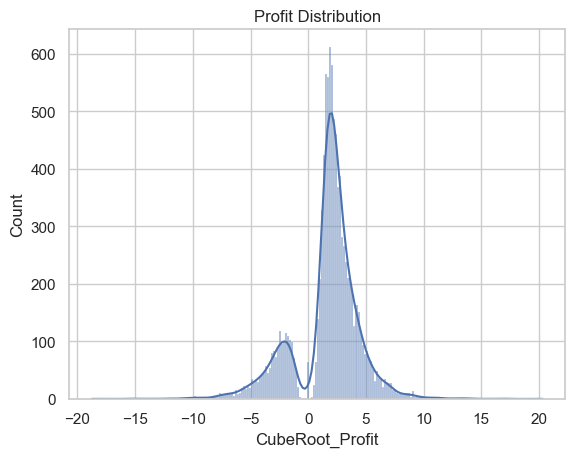

In [ ]:
sns.histplot(df['CubeRoot_Sales'], kde=True)
plt.title('Persebaran Sales')
plt.show()

sns.histplot(df['CubeRoot_Profit'],kde=True)
plt.title('Persebaran Profit')
plt.show()

Dalam transformasi ini, persebaran data mereka sudah terlihat lebih jelas walaupun masih terdapat banyak outlier. Persebaran penjualan terlihat distribusi tidak normal dan distribusi profit termasuk menjadi distribusi binomial. Distribusi ini terjadi karena terdapatnya profit bernilai negatif dan positif yang berkumpul. **Untuk keperluan analisa, kolom CubeRoot_Profit dan CubeRoot_Sales hanya akan digunakan untuk analisa produk secara keseluruhan (distribusi) namun tidak untuk analisa produk secara satu-persatu.** Ini dikarenakan transformasi Cube Root bisa mengubah analisa data sehingga analisa produk menjadi sensitif. 

Untuk selanjutnya, kita akan mengubah beberapa data secara nilai dan urutan untuk keperluan analisis.

**MENGUBAH NEGARA UNITED STATES MENJADI UNITED STATES OF AMERICA**

In [14]:
df['Country'] = df['Country'].replace('United States','United States of America')

**MENGUBAH URUTAN DATA SESUAI DENGAN ORDER DATE**

In [15]:
df = df.sort_values(by='Order Date')

In [16]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,CubeRoot_Profit,CubeRoot_Sales
7980,7981,APJ-2020-103800,2020-01-04,20200104,Brian Dickens,Japan,Tokyo,APJ,JAPN,Siemens,...,Manufacturing,SMB,Support,730VUNTJF5,16.448,2,0.2,5.5512,1.770635,2.543144
739,740,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,Retail,Enterprise,FinanceHub,XGQWR8K66V,11.784,3,0.2,4.2717,1.622558,2.275609
740,741,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,Retail,Enterprise,Marketing Suite - Gold,54J2FWJY59,272.736,3,0.2,-64.7748,-4.016077,6.485062
741,742,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,Retail,Enterprise,ContactMatcher,K3HDHHY5YG,3.540,2,0.8,-5.4870,-1.763782,1.524057
1759,1760,EMEA-2020-141817,2020-01-06,20200106,Ella Springer,France,Paris,EMEA,EU-WEST,Mitsubishi,...,Manufacturing,SMB,ChatBot Plugin,PGSY1LZQ71,19.536,3,0.2,4.8840,1.696649,2.693262


**DATA ANALYSIS**

Sekarang kita akan masuk tahap data analisis. Dalam analisa data, keperluan pemakaian data akan bergantung terhadap masalah bisnis yang dihadapi. Oleh karena itu, tidak semua aspek data akan digunakan untuk keperluan analisis. Perusahaan ini meminta analisis **performa produk yang terbaik hingga terburuk**. Oleh karena itu, ada beberapa business goal yang harus dijabarkan untuk membuat tujuan analisa lebih jelas.

**GOALS**

Performa produk bisa dianalisa berdasarkan beberapa aspek. Aspek ini akan menjadi tujuan dari analisa bisnis yang dicari. Aspek ini adalah:

- Profitability : Profit yang dibawa oleh produk dan menunjukkan seberapa menguntungkan suatu produk untuk sebuah perusahaan.
- Sales Revenue : Jumlah produk yang sudah terjual menunjukkan popularitas suatu produk dan seberapa penting produk tersebut dan permintaan.
- Geography     : Menunjukkan persebaran produk dan kuantitas produk. 
- Evergreen     : Menunjukkan kapabilitas produk secara sales dalam rentang waktu. 

aspek ini menjadi pertimbangan untuk menentukan performa keseluruhan dari setiap produk dengan menggunakan metode bernama **composite ranking**. Setiap produk akan dibuat kan rangking berdasarkan aspek yang sudah disebutkan dan akan dinilai. Nilai tersebut akan diberikan pemberat ('weight') yang menunjukkan seberapa pentingnya aspek dalam performa keseluruhan.

Penentuan weight dari setiap aspek dibuat berdasarkan asumsi perusahaan. Untuk analisis data kali ini, penentuan weight adalah:

- Profitability    : 0.4
- Sales Performance: 0.3
- Geography        : 0.2
- Evergreen        : 0.1

Profitability merupakan aspek terpenting untuk dari setiap performa produk oleh karena itu aspek ini mendapatkan weight terbesar. Untuk Sales performance mendapatkan weight kedua terbesar karena menunjukkan popularitas dari produkd dan kontribusi kepada revenue. Geography menunjukkan persebaran produk dan kuantitas produk sehingga mendapatkan weight ketiga terbesar. Dan evergreen mendapatkan rangking terakhir karena dengan adanya perkembangan teknologi, produk bisa berubah dari digunakan menjadi ditinggalkan. Inilah aspek beserta weight yang digunakan untuk analisis ini.

ref composite rank: https://www.statisticssolutions.com/composite-scores/

PRODUCT LIST

Untuk pertama, kita liat produk apa saja yang kita akan analisis.

In [17]:
list(df['Product'].unique())

['Support',
 'FinanceHub',
 'Marketing Suite - Gold',
 'ContactMatcher',
 'ChatBot Plugin',
 'Site Analytics',
 'Storage',
 'SaaS Connector Pack',
 'Data Smasher',
 'SaaS Connector Pack - Gold',
 'Marketing Suite',
 'OneView',
 'Big Ol Database',
 'Alchemy']

PROFITABILITY

pertama kita akan melihat ranking produk dari seberapa besar mereka berkontribusi untuk total profit perusahaan.

In [18]:
overall_profit= df['Profit'].sum()
overall_profit


286397.0217

In [19]:
total_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)
total_profit

Product
Alchemy                       55617.8249
Site Analytics                44515.7306
Data Smasher                  41936.6357
Support                       32864.4698
FinanceHub                    32136.4203
Marketing Suite - Gold        21278.8264
OneView                       18138.0054
SaaS Connector Pack           13059.1436
ContactMatcher                12496.2822
SaaS Connector Pack - Gold    6964.1767 
ChatBot Plugin                6527.7870 
Big Ol Database               3384.7569 
Storage                       949.5182  
Marketing Suite              -3472.5560 
Name: Profit, dtype: float64

Bisa dilihat, profit terbesar berasal dari product bernama Alchemy dan produk terendah berasal dari produk bernama Marketing Suite hingga bisa menghasilkan profit minus. Mari kita lihat bentuknya lebih jelas dengan chart.

C:\Users\skyne\AppData\Local\Temp\ipykernel_11516\2705362835.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Profit', data=total_profit, ci=None)


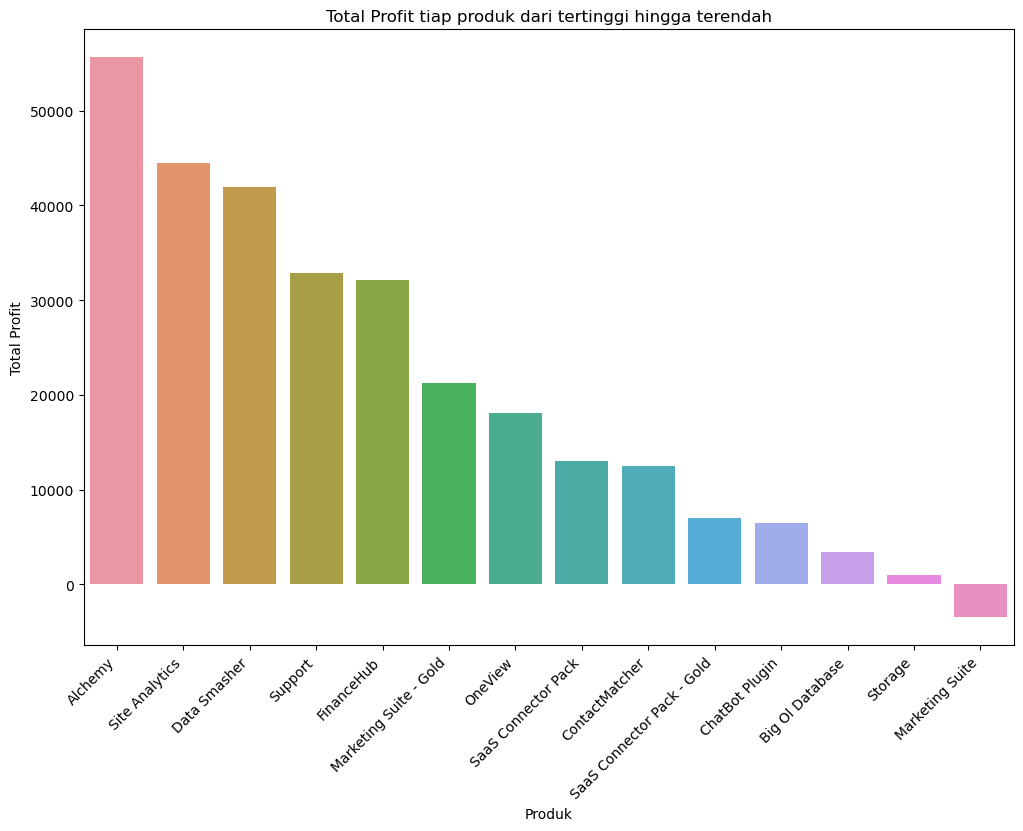

In [20]:
total_profit = df.groupby('Product')['Profit'].sum().reset_index()

total_profit = total_profit.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Product', y='Profit', data=total_profit, ci=None)
plt.title('Total Profit tiap produk dari tertinggi hingga terendah')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [21]:
negative_profit_tanpa_diskon = df[(df['Profit'] < 0) & (df['Discount'] == 0)]

print("\nData dengan hanya profit negatif tanpa diskon: ")
print(negative_profit_tanpa_diskon)


Data dengan hanya profit negatif tanpa diskon: 
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit, CubeRoot_Profit, CubeRoot_Sales]
Index: []

[0 rows x 21 columns]


Terlihat dari ranking profit produk, marketing suite berkontribusi terhadap profit negatif dari perusahaan sedangkan marketing suite berdampak negatif terhadap profit perusahaan. Transaksi negatif di perusahaan biasanya terjadi karena adanya potongan diskon yang berlebihan. Karena profit negatif hanya disebabkan oleh diskon, produk Marketing Suite bisa disebabkan oleh pengaplikasian diskon yang tidak benar.

In [24]:
total_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)

max_rank = len(total_profit)

points_dict = {ranked_product: max_rank - rank for rank, ranked_product in enumerate(total_profit.index)}

df['P_Poin'] = df['Product'].map(points_dict)

df[['Product', 'P_Poin']].groupby('Product').mean().sort_values('P_Poin', ascending=False)

,P_Poin
Product,
Alchemy,14.0
Site Analytics,13.0
Data Smasher,12.0
Support,11.0
FinanceHub,10.0
Marketing Suite - Gold,9.0
OneView,8.0
SaaS Connector Pack,7.0
ContactMatcher,6.0


P_Poin di atas akan digunakan sebagai poin yang ditambahkan dalam mengetahui composite ranking.

**SALES PERFORMANCE**

Selanjutnya kita akan menganalisa performa sales setiap produk. Untuk kebutuhan analisis, kita akan hanya menggunakan data penjualan yang **tidak memakai diskon**. Kita akan memakai batasan ini karena **kita ingin mencari tahu demand dan kontribusi suatu produk terhadap pengembalian terlepas dari promosi marketing**.

In [25]:
df['Sales_NoDisc'] = df['Sales'] - df['Sales'] * df['Discount']
total_revenue = df['Sales_NoDisc'].sum()
total_sales = df.groupby('Product')['Sales_NoDisc'].sum().sort_values(ascending=False)
display(total_revenue, total_sales)

1974618.7259590002

Product
ContactMatcher                322440.988600
FinanceHub                    290471.264500
Site Analytics                281914.114800
Marketing Suite - Gold        210645.638400
Data Smasher                  157578.316400
Big Ol Database               142472.649500
Alchemy                       131528.299600
Support                       117065.611200
OneView                       100041.861300
Marketing Suite               94079.405259 
SaaS Connector Pack           82996.211200 
ChatBot Plugin                25297.961600 
SaaS Connector Pack - Gold    15302.411600 
Storage                       2783.992000  
Name: Sales_NoDisc, dtype: float64

Bisa dilihat bahwa ContactMatcher merupakan produk dengan kontribusi sales tertinggi dibandingkan produk lainnya. Ini menunjukkan bahwa ContactMatcher merupakan produk dengan demand yang tertinggi dan berkontribusi terhadap sales revenue perusahaan. Produk Alchemy yang menempati posisi satu dalam profit hanya menduduki posisi tengah (ranking 7). Ini menunjukkan bahwa produk Alchemy mempunyai profit yang lebih bagus sehingga dengan sales yang lebih sedikit, bisa memberikan kontribusi yang lebih besar kepada kesuluruhan profit perusahaan. 

Storage secara sales menjadi kontribusi yang terendah dari sales dan kedua terendah dari profit. Hal ini bisa saling berhubungan namun tergantung dari seberapa banyak kuantitas produk yang terjual. Bisa jadi hal tersebut karena banyaknya profit yang terpotong akibat diskon.

FinanceHub dan Site Analytics menjadi produk dengan rangking teratas di kedua kategori menunjukkan popularitas produk tersebut dan profitabilitas sehingga menunjukkan produk tersebut berharga.

C:\Users\skyne\AppData\Local\Temp\ipykernel_11516\3961393959.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Sales_NoDisc', data=total_sales, ci=None)


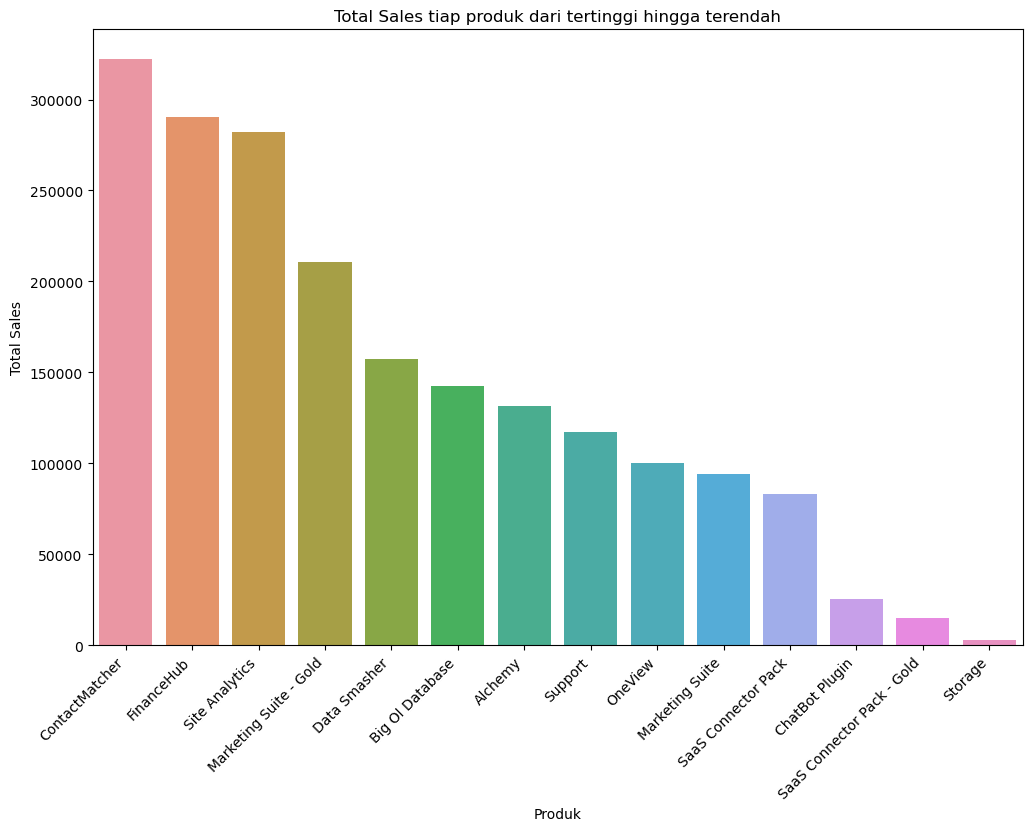

In [26]:
total_sales = df.groupby('Product')['Sales_NoDisc'].sum().reset_index().sort_values('Sales_NoDisc',ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Product', y='Sales_NoDisc', data=total_sales, ci=None)
plt.title('Total Sales tiap produk dari tertinggi hingga terendah')
plt.xlabel('Produk')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [27]:
total_sales = df.groupby('Product')['Sales_NoDisc'].sum().sort_values(ascending=False)
max_rank = len(total_sales)
points_dict = {ranked_product: max_rank - rank for rank, ranked_product in enumerate(total_sales.index)}
df['SP_Poin'] = df['Product'].map(points_dict)
df[['Product', 'SP_Poin']].groupby('Product').mean().sort_values('SP_Poin', ascending=False)


,SP_Poin
Product,
ContactMatcher,14.0
FinanceHub,13.0
Site Analytics,12.0
Marketing Suite - Gold,11.0
Data Smasher,10.0
Big Ol Database,9.0
Alchemy,8.0
Support,7.0
OneView,6.0


**GEOGRAPHY**

Selanjutnya, kita akan melihat dua aspek dari Geography. Yaitu secara kuantitas dan secara persebaran. Kita akan membuat rangking produk yang dibeli dari semua negara. Negara yang tidak membeli akan diisi dengan nilai 0.

In [28]:
pivot_df = df.pivot_table(index='Product', columns='Country', values='Quantity', aggfunc='sum', fill_value=0)
pivot_df

Country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,...,South Africa,South Korea,Spain,Sweden,Taiwan,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America
Product,,,,,,,,,,,,,,,,,,,,,
Alchemy,0,14,0,0,3,17,0,0,0,0,...,0,2,8,4,0,5,0,0,22,60
Big Ol Database,19,12,8,8,5,21,9,3,0,0,...,3,0,8,11,0,0,0,0,73,86
ChatBot Plugin,37,149,11,51,91,109,47,45,7,7,...,65,30,88,107,0,10,22,27,336,644
ContactMatcher,53,392,2,88,219,474,191,57,30,15,...,130,100,156,234,17,51,45,44,804,1338
Data Smasher,34,145,0,49,69,198,85,17,5,6,...,29,24,37,72,3,19,29,43,281,568
FinanceHub,35,195,3,63,117,180,61,59,12,8,...,71,41,76,71,3,10,6,10,493,815
Marketing Suite,6,43,0,9,10,28,18,9,0,0,...,6,12,17,19,0,10,5,9,113,198
Marketing Suite - Gold,33,151,0,32,83,182,78,43,47,11,...,60,48,69,54,5,14,15,8,357,637
OneView,48,76,0,17,55,54,21,26,0,14,...,44,26,48,57,4,3,9,0,176,346


Selanjutnya, kita akan menghitung total dari akumulasi poin. poin 0 akan di rangking menjadi 1 agar bisa berada dalam unit yang sama.

In [29]:

rank_df = pivot_df.rank(ascending=True, axis=0, method='min')

points_df = rank_df.applymap(int)

points_df['Total_Points'] = points_df.sum(axis=1)

points_df

Country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,...,South Korea,Spain,Sweden,Taiwan,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Total_Points
Product,,,,,,,,,,,,,,,,,,,,,
Alchemy,1,2,1,1,1,1,1,1,1,1,...,3,1,1,1,4,1,1,1,1,81
Big Ol Database,4,1,12,2,2,3,2,2,1,1,...,1,1,2,1,1,1,1,2,2,98
ChatBot Plugin,10,9,13,11,11,7,7,10,6,6,...,8,10,12,1,6,10,11,8,9,399
ContactMatcher,12,14,9,13,14,14,14,11,13,11,...,13,14,14,14,13,14,14,14,14,604
Data Smasher,8,8,1,9,7,12,12,6,5,5,...,6,5,10,7,11,12,13,7,7,404
FinanceHub,9,12,10,12,13,10,8,14,10,7,...,9,9,9,7,6,4,7,12,12,444
Marketing Suite,2,4,1,4,3,4,3,4,1,1,...,4,3,3,1,6,3,6,5,5,157
Marketing Suite - Gold,6,10,1,8,10,11,9,9,14,8,...,12,8,6,10,10,9,4,9,8,397
OneView,11,6,1,7,6,5,4,8,1,9,...,7,7,7,9,3,6,1,6,6,271


Setelah menjumlahkan, kita akan membuat chart yang menggambarkan popularitas dari semua produk.

C:\Users\skyne\AppData\Local\Temp\ipykernel_11516\1252342453.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Geo_Aggregate', data=geo_chart, ci=None)


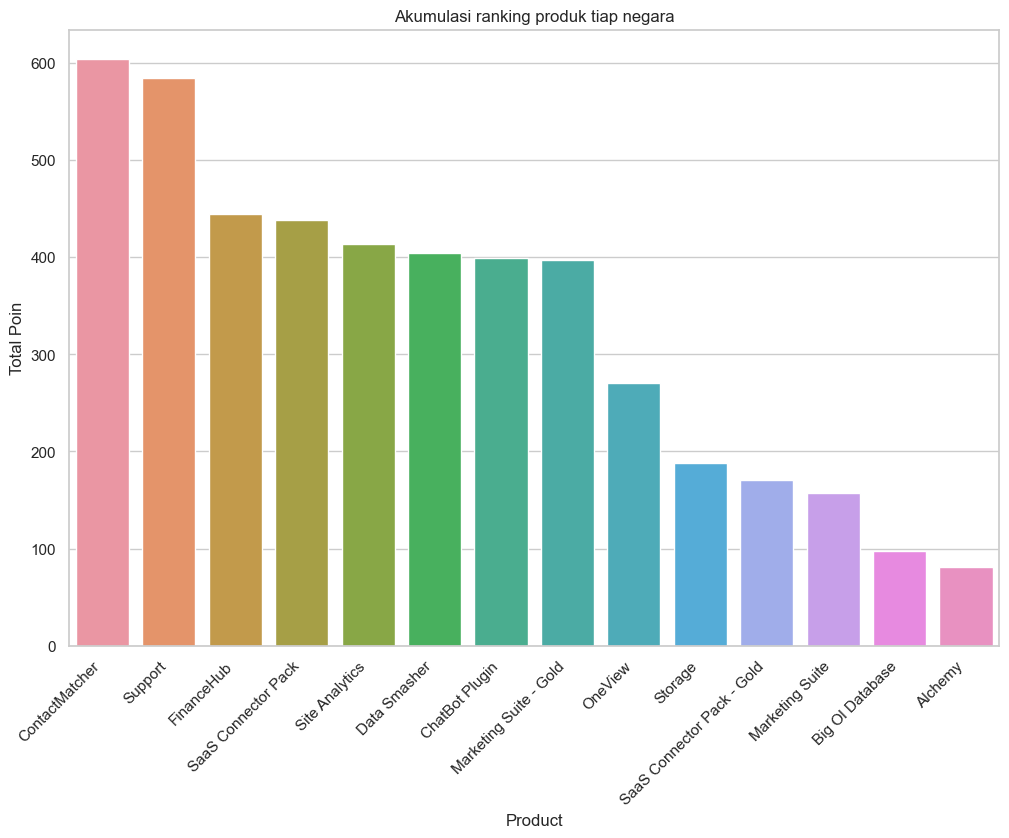

In [43]:

rank_df = pivot_df.rank(ascending=True, axis=0, method='min')

points_df = rank_df.applymap(int)

points_df['Total_Points'] = points_df.sum(axis=1)

df['Geo_Poin'] = df['Product'].map(points_df['Total_Points'].rank(ascending=False, method='min'))

df['Geo_Aggregate'] = df['Product'].map(points_df['Total_Points'])

geo_chart = df.groupby('Product')['Geo_Aggregate'].mean().reset_index().sort_values('Geo_Aggregate',ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Product', y='Geo_Aggregate', data=geo_chart, ci=None)
plt.title('Akumulasi ranking produk tiap negara')
plt.xlabel('Product')
plt.ylabel('Total Poin')
plt.xticks(rotation=45, ha='right')
plt.show()

Terlihat bahwa contact matcher merupakan sebuah produk dengan rangking yang tinggi secara kuantitas dan bisa tersebar di berbagai tempat. 

Support juga menjadi salah satu produk yang banyak dicari meskipun dia tidak membawa banyak penjualan (ranking 8). Ini merupakan indikasi bahwa support merupakan produk yang populer namun sangat bergantung terhadap diskon agar bisa mendapatkan penjualan.

Alchemy berada di peringkat terbawah menunjukkan bahwa Alchemy mempunyai pasar yang spesifik namun menguntungkan untuk perusahaan SaaS

C:\Users\skyne\AppData\Local\Temp\ipykernel_11516\782811426.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\skyne\AppData\Local\Temp\ipykernel_11516\782811426.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  continents = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


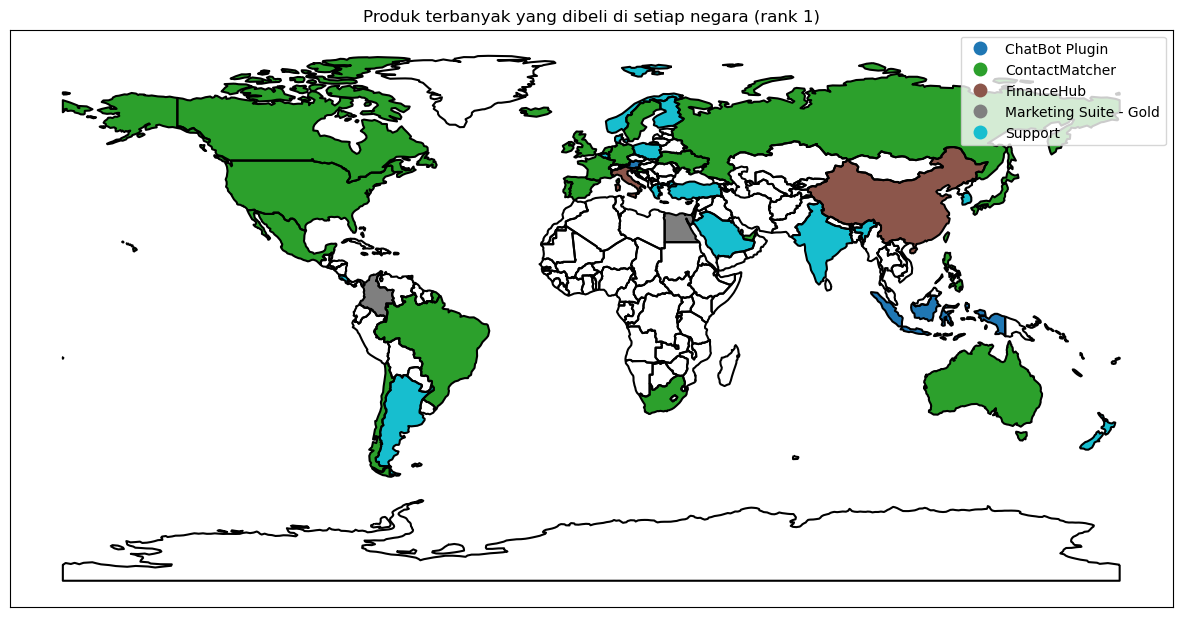

In [33]:

Produk_negara = points_df.idxmax(axis=0).reset_index(name='Most_Bought_Product')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = pd.merge(world, Produk_negara, how='inner', left_on='name', right_on='Country')

continents = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
continents.boundary.plot(ax=ax, color='black')
merged_data.plot(column='Most_Bought_Product', ax=ax, legend=True)
ax.set_title('Produk terbanyak yang dibeli di setiap negara (rank 1)')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

terlihat sesuai dengan bar kuantitas, performa contact matcher, support, dan finance hub sesuai dengan sebaran data negara yang mempunyai produk rangking 1. Namun beberapa produk lain seperti chatbot plugin dan marketing suite gold merupakan produk teratas dari beberapa negara lain walaupun mereka tidak menjadi rangking 5 teratas dari negara lain. Sebaran peta diatas akan dijadikan konsiderasi dalam menarik kesimpulan dan saran.

**EVERGREEN**

Sekarang kita akan melihat perubahan sales dari waktu ke waktu. Hal ini menunjukkan seberapa sering produk tersebut dibeli dan seberapa tidak lekang oleh waktu (evergreen) produk tersebut. Kita akan menggunakan sales data dengan diskon dengan asumsi bahwa **Penggunaan Diskon dalam idustri SaaS menyamai 50%** sehingga sama dengan komposisi penggunaan diskon oleh dataset ini dan data poin sales ini dianggap umum.

In [34]:
df['OrderYearMonth'] = df['Order Date'].dt.to_period('M')

df['SalesGrowthRate'] = df.groupby('Product')['Sales'].pct_change()

df['SalesGrowthRate'] = df['SalesGrowthRate'].fillna(0)

total_sales_growth_rate = df.groupby('Product')['SalesGrowthRate'].mean()

growth_rate_ranking = total_sales_growth_rate.rank(ascending=True, method='min')

df['OT_Poin'] = df['Product'].map(growth_rate_ranking.astype(int))

display(total_sales_growth_rate.reset_index().sort_values('SalesGrowthRate',ascending=False), growth_rate_ranking.reset_index().sort_values('SalesGrowthRate',ascending=False))

,Product,SalesGrowthRate
3,ContactMatcher,17.192740
5,FinanceHub,10.449026
8,OneView,7.557170
1,Big Ol Database,4.959941
7,Marketing Suite - Gold,3.983616
4,Data Smasher,3.693025
11,Site Analytics,3.451582
9,SaaS Connector Pack,3.222186
13,Support,2.872641
10,SaaS Connector Pack - Gold,2.776501


,Product,SalesGrowthRate
3,ContactMatcher,14.0
5,FinanceHub,13.0
8,OneView,12.0
1,Big Ol Database,11.0
7,Marketing Suite - Gold,10.0
4,Data Smasher,9.0
11,Site Analytics,8.0
9,SaaS Connector Pack,7.0
13,Support,6.0
10,SaaS Connector Pack - Gold,5.0


bisa terlihat bahwa contact matcher merupakan produk yang paling evergreen dari perusahaan SaaS ini. Rata-rate sales growth yang tinggi menunjukkan bahwa ada pertumbuhan yang konsisten dari tahun ke tahun dan membuat indikasi bahwa produk tersebut akan selalu dibeli oleh konsumen. 

**COMPOSITE RANKING**

In [39]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,CubeRoot_Sales,P_Poin,Sales_NoDisc,SP_Poin,Geo_Poin,Geo_Aggregate,OrderYearMonth,SalesGrowthRate,OT_Poin,Composite_Rank
7980,7981,APJ-2020-103800,2020-01-04,20200104,Brian Dickens,Japan,Tokyo,APJ,JAPN,Siemens,...,2.543144,11,13.1584,7,2,585,2020-01,0.0,6,7.5
739,740,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,2.275609,10,9.4272,13,3,444,2020-01,0.0,13,9.8
740,741,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,6.485062,9,218.1888,11,8,397,2020-01,0.0,10,9.5
741,742,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,1.524057,6,0.7080,14,1,604,2020-01,0.0,14,8.2
1759,1760,EMEA-2020-141817,2020-01-06,20200106,Ella Springer,France,Paris,EMEA,EU-WEST,Mitsubishi,...,2.693262,4,15.6288,3,7,399,2020-01,0.0,4,4.3


In [41]:
df['P_Poin'] = df['P_Poin'].astype(int)
df['SP_Poin'] = df['SP_Poin'].astype(int)
df['Geo_Poin'] = df['Geo_Poin'].astype(int)
df['OT_Poin'] = df['OT_Poin'].astype(int)

weights = {
    'P_Poin': 0.4,
    'SP_Poin': 0.3,
    'Geo_Poin': 0.2,
    'OT_Poin': 0.1
}

df['Composite_Rank'] = (
    df['P_Poin'] * weights['P_Poin'] +
    df['SP_Poin'] * weights['SP_Poin'] +
    df['Geo_Poin'] * weights['Geo_Poin'] +
    df['OT_Poin'] * weights['OT_Poin']
)

composite_rank = df.groupby('Product')['Composite_Rank'].mean()
composite_rank_sort = composite_rank.sort_values(ascending=False)

print(composite_rank_sort)

Product
Alchemy                       11.1
Site Analytics                10.6
Data Smasher                  9.9 
FinanceHub                    9.8 
Marketing Suite - Gold        9.5 
ContactMatcher                8.2 
OneView                       8.0 
Big Ol Database               7.6 
Support                       7.5 
SaaS Connector Pack           5.5 
SaaS Connector Pack - Gold    5.3 
Marketing Suite               4.5 
ChatBot Plugin                4.3 
Storage                       3.2 
Name: Composite_Rank, dtype: float64


Setelah di ranking, terlihat produk unggulan dari perusahaan SaaS ini dari yang terbaik hingga terendah.

**KESIMPULAN DAN REKOMENDASI**

**ANALISA PRODUK NILAI 11 - 9**
- Alchemy sebagai produk terbaik dari perusahaan SaaS meskipun memiliki ranking menengah hingga ke bawah di aspek selain profit. Ini menunjukkan performa Alchemy sebagai produk sangat bergantung terhadap profitabilitas produk.
- Site analytics sebagai produk kedua menunjukkan adanya juga profitabilitas yang tinggi. Dan juga site analytics berkontribusi besar dalam sales revenue perusahaan dengan peringkat ke tiga menunjukkan bahwa produk ini merupakan produk populer, mempunyai demand yang tinggi dan penting untuk cashflow perusahaan.
- Data Smasher merupakan produk dengan profit ketiga tertinggi namun menempati peringkat 5 untuk sales performance, peringkat ke enam secara geography dan peringkat ke enam untuk sales growth. Ini menunjukkan bahwa performa produk Data Smasher bergantung terhadap kekuatan profitibilitas.
- Finance Hub merupakan produk yang menempati peringkat tiga teratas untuk kategori sales performance , Geography, dan evergreen menunjukkan produk ini merupakan produk populer namun mempunyai masalah dalam profitabilitas (rank 5). Kemungkinan diperlukan adanya review penerapan diskon agar profit bisa membaik.
- Marketing Suite - Gold merupakan produk yang unggul di bidang sales performance (rank 4) dan evergreen (rank 4) namun tidak unggul di bidang profit dan geography. Namun, dia menempati peringkat satu untuk penjualan di negara mesir. Ini bisa menjadi indikasi bahwa marketing suite - gold mempunyai demand yang spesifik yang sedang berkembang dan bisa berpotensial untuk masa depan.

**ANALISA PRODUK NILAI 8 - 5**
- ContactMatcher merupakan produk yang memiliki keunggulan dalam 3 ranking (sales performance, geography, evergreen) namun tidak memiliki profit yang tinggi. Produk ini bisa menjadi produk yang di kombinasikan dengan produk lain,terutama produk yang tidak memiliki popularitas tinggi agar bisa menaikkan popularitas produk lainnya
- Oneview memiliki ranking yang rendah untuk kategori profit (rank 6), kategori sales performance (rank 9), dan kategori geography (rank 9), namun memiliki perkembangan sales growth (evergreen) yang tinggi (rank 3). Produk ini bisa menjadi produk yang potensial ke depannya.
- Big Ol Database juga memiliki rank yang rendah untuk untuk kategori profit (rank 12) dan kategori geography (rank 13), namun memiliki perkembangan sales growth (evergreen) yang tinggi (rank 4) dan sales performance menengah (rank 7). Produk ini bisa menjadi potensi untuk dievaluasi untuk menentukan market yang spesifik dan pricing yang lebih sesuai.
- Support mempunyai rank yang tinggi untuk profit (rank 4) dan geography (rank 2) yang menunjukkan keuntungan dan kepopuleran produk tersebut. Namun produk tersebut tidak memiliki sales performance yang baik (rank 8) dan sales growth yang rendah(rank 9). Ini bisa menunjukkan produk ini perlu di optimisasi untuk bisa meningkatkan aspek lainnya.
- SaaS Connector Pack memiliki geography yang tinggi (rank 4) namun memiliki profit (rank 8), sales performance (rank 11), dan evergreen (rank 8) yang rendah. INi menunjukkan produk yang populer namun secara pricing tidak memuaskan.
- SaaS Connector Pack - Gold memiliki ranking yang konsisten rendah di seluruh kategori (profit: rank 10, Sales performance: rank 13, Geography: rank 11 dan evergreen: rank 10). Ini menunjukkan produk ini perlu dievaluasi kembali secara value proposition apakah sudah mempunyai market fit.

**ANALISA PRODUK NILAI 4 - 3**

- Marketing suite merupakan produk yang memiliki permasalah dalam bidang profit yang menyebabkan profit perusahaan berkurang karena profit negatif. Ini disebabkan banyak sales diskon yang berakibat kepada profit negatif. Evaluasi diskon akan sangat berguna untuk menghilangkan sales yang negatif.

- Chatbot plugin merupakan kasus unik di mana produk ini memiliki profit yang rendah (rank 11), sales performance yang rendah (rank 12), dan evergreen yang rendah (rank 11). Namun chatbot plugin memiliki ranking yang menengah dalam geography(rank 7) artinya, ada potensi yang belum dicapai oleh produk chatbot plugin. Ini dibuktikan juga dengan produk ini bisa menguasai produk top di wilayah indonesia.

- Storage merupakan produk dengan ranking terendah dari segala bagian. Ini menunjukkan perlu adanya evaluasi dalam komponen produk ini.

**REKOMENDASI**

**Fokus terhadap produk tertinggi**

Kebanyakan produk teratas memiliki profit yang tinggi kecuali marketing suite gold. Ini menunjukkan adanya potensi yang perlu dikembangkan dengan marketing suite gold. Karena sales performance nya yang tinggi, maka diperlukan adanya optimisasi profit.

untuk produk Alchemy, Site Analytics, dan data smasher, Mereka sudah memiliki performa yang baik secara profitabilitas. Perusahaan SaaS harus memfokuskan sumber daya mereka untuk memastikan produk ini bisa terus berada di posisi teratas.

**MAKSIMALISASI PROFIT** 

Produk marketing suite merupakan produk yang harus dievaluasi kembali karena produk ini memiliki profit yang negatif. Untuk memaksimalisasi profit, ini merupakan langkah pertama yang harus diambil oleh perusahaan SaaS agar bisa memaksimilisasi profit. Untuk produk lain yang memiliki profit rendah, maka komponen produk alchemy, site analytics, dan data smasher bisa menjadi acuan untuk produk lainnya.

**SALES REVENUE ENHANCEMENT** 

ContactMatcher merupakan produk yang unggul dalam sales performance dan geography yang menunjukkam popularitas. Produk ini bisa dijadikan sebagai produk yang dijadikan ke dalam produk mix dengan produk lain. Hal ini juga bisa diterapkan kepada produk di kategori 5 teratas dalam bidang geography.

Konsiderasi lain adalah untuk membuat monitor dashboard untuk bisa melihat dan menelusuri perkembangan produk. Kekurangan analisis ini adalah mempunyai bias terhadap profit sehingga aspek lain yang penting terhadap perusahaan bisa terlewatkan. Diharapkan, setelah mengikuti rekomendasi ini profit perusahaan SaaS akan semakin meningkat.